# Comparative Study of Machine Learning Classification Algorithms for Disease Diagnosis

## Step 1 : Define Research Objective
The study aims to compare different Classification Machine Learning Algorithms in a Healthcare sector problem of disease detection.

Importing libraries for data exploration and visualization

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Data Collection
This dataset is taken from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset <br>

It has the following features
- id$\;\;\;$ : $\;\;\;$unique identifier <br>
- gender$\;\;\;$ : $\;\;\;$"Male", "Female" or "Other" <br>
- age$\;\;\;$ : $\;\;\;$age of the patient <br>
- hypertension$\;\;\;$ : $\;\;\;$0 if the patient doesn't have hypertension, 1 if the patient has hypertension <br>
- heart_disease$\;\;\;$ : $\;\;\;$0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease <br>
- ever_married$\;\;\;$ : $\;\;\;$"No" or "Yes" <br>
- work_type$\;\;\;$ : $\;\;\;$"children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br>
- Residence_type$\;\;\;$ : $\;\;\;$"Rural" or "Urban" <br>
- avg_glucose_level$\;\;\;$ : $\;\;\;$average glucose level in blood <br>
- bmi$\;\;\;$ : $\;\;\;$body mass index <br>
- smoking_status$\;\;\;$ : $\;\;\;$"formerly smoked", "never smoked", "smokes" or "Unknown" <br>
- stroke$\;\;\;$ : $\;\;\;$1 if the patient had a stroke or 0 if not <br>

Importing the dataset

In [7]:
df = pd.read_csv('healthcare_dataset_stroke_data.csv')

## Step 3 : Exploratory Data Analysis
This step aims to discover, explore, analyze the data and aids to gain insights into the features of the data.

In [8]:
# Checking the number of rows and columns in the dataset
df.shape

(5110, 12)

In [9]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [10]:
# Displaying the first 5 records
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
# Displaying the columns of the dataset with their data types and counter
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
# Displaying the statistical measures of the numerical features of the dataset
df.describe(include=np.number)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Correlation Matrix

<AxesSubplot:>

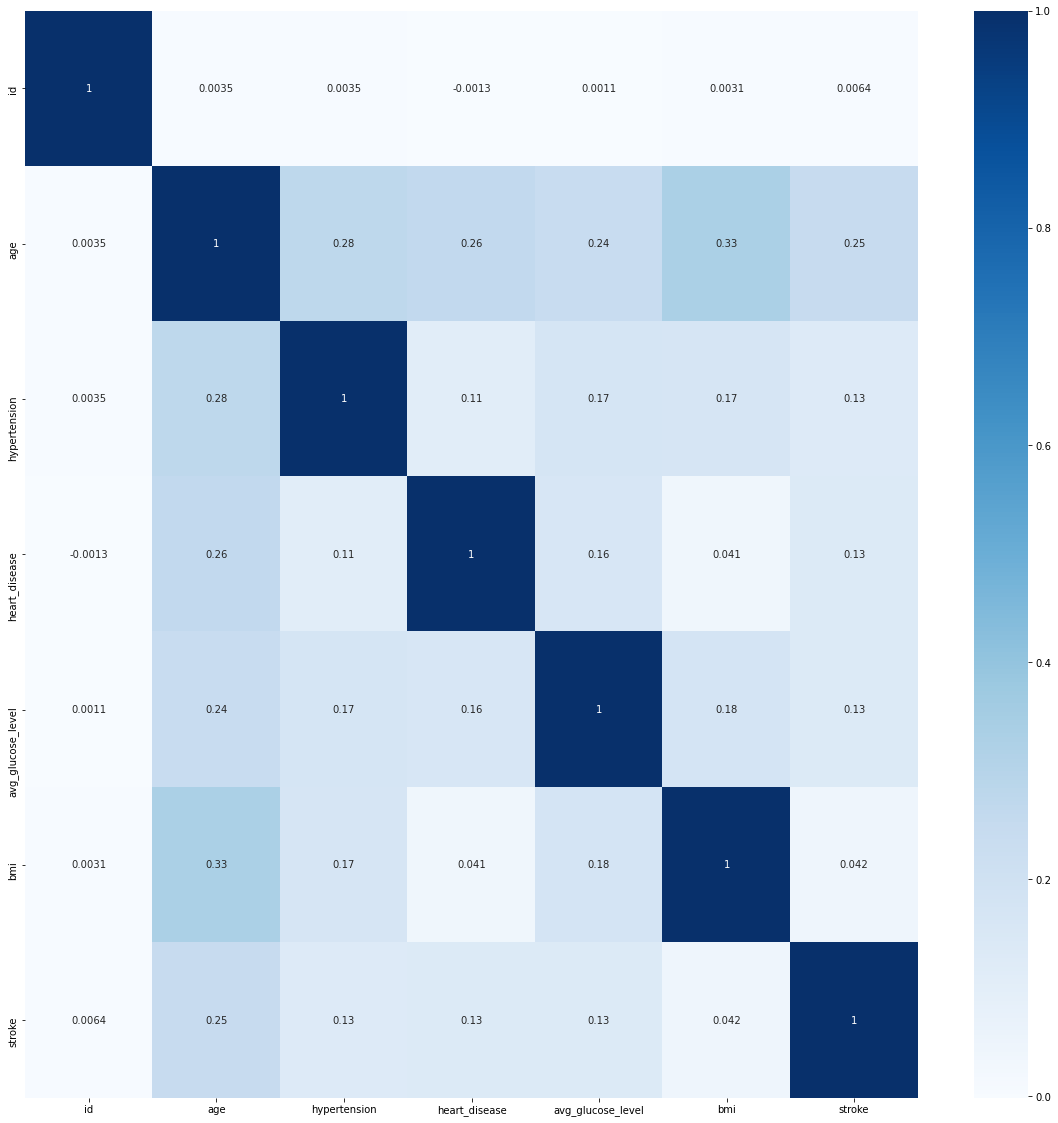

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

Inference: Independent features are not highly correlated

In [14]:
# Displaying the statistical measures of the categorical features of the dataset
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [15]:
# Displaying the data types of the features
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [16]:
# Checking for NaN vabmlues in the dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

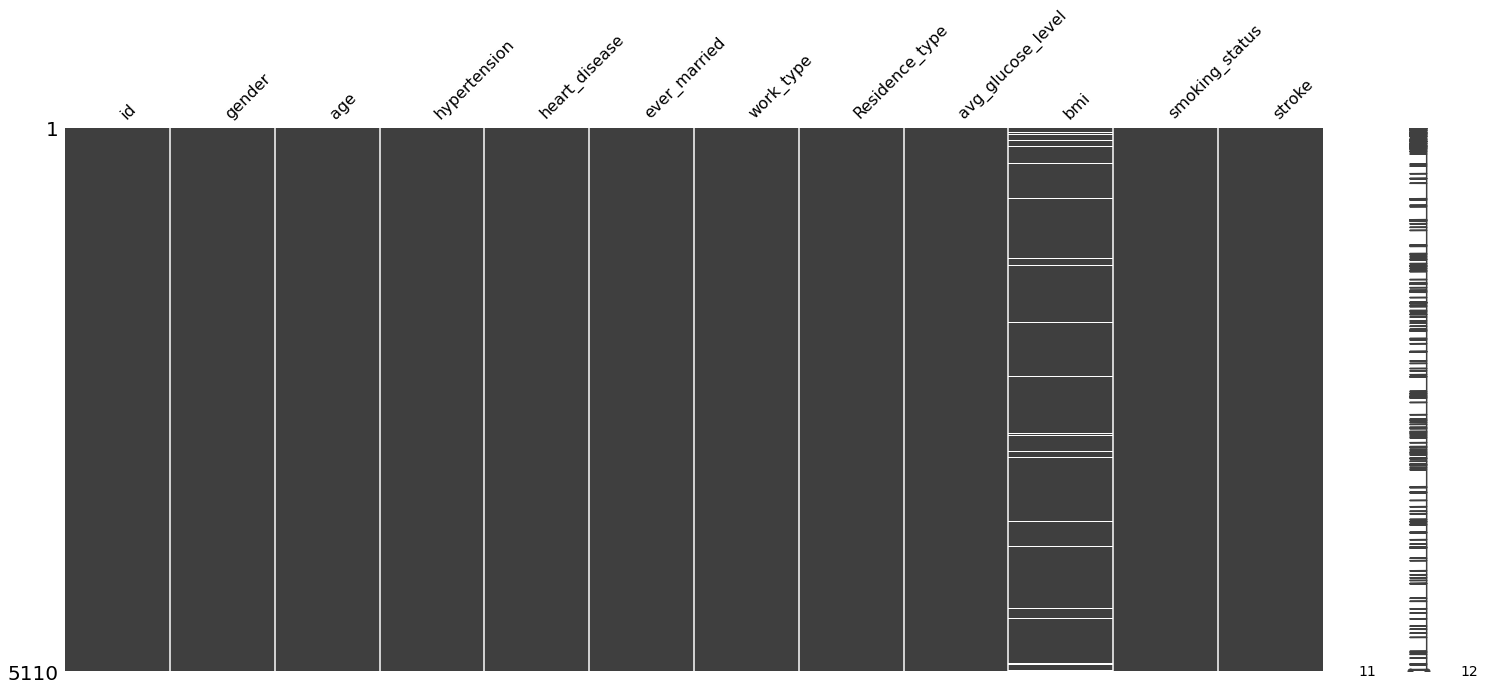

In [17]:
# Visualize missing values
import missingno as msno
msno.matrix(df)

Inference: There are NaN values in the 'bmi' feature

In [18]:
# DataFrame with numerical features for EDA
df_num = df.select_dtypes(include=np.number)

In [19]:
df_num.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [20]:
# Removing the categorical features
df_num.drop(['id','hypertension','heart_disease','stroke'], axis='columns', inplace=True)

In [21]:
df_num.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


###### Visualization of the numerical features of the dataset using Distribution Plots

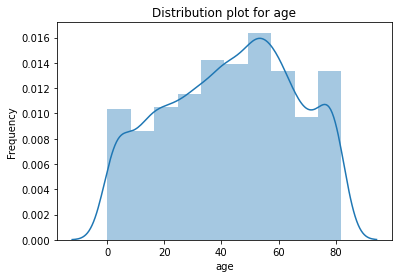

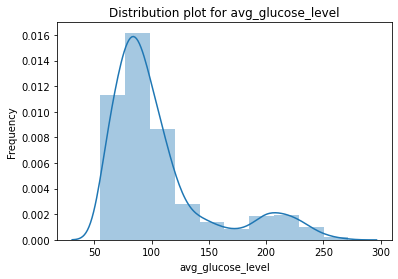

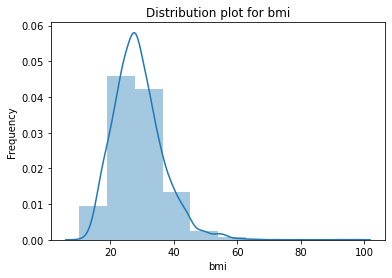

In [22]:
for cols in df_num.columns:
    distributionplot = sns.distplot(a=df_num[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

In [23]:
# DataFrame for categorical features
df_cat = df.select_dtypes(include= 'O')

In [24]:
df_cat=df_cat.join(df['hypertension'])
df_cat=df_cat.join(df['heart_disease'])
df_cat=df_cat.join(df['stroke'])

In [25]:
df_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,Male,Yes,Private,Urban,formerly smoked,0,1,1
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1
2,Male,Yes,Private,Rural,never smoked,0,1,1
3,Female,Yes,Private,Urban,smokes,0,0,1
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1


###### Visualization of the categorical features of the dataset using Count Plots

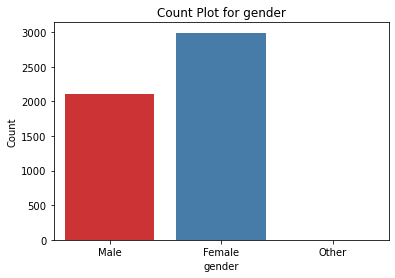

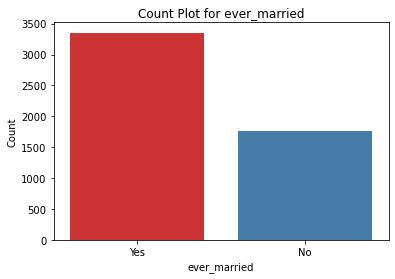

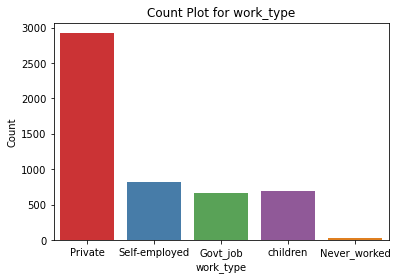

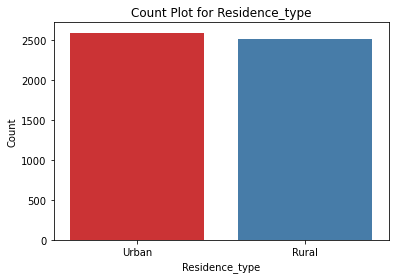

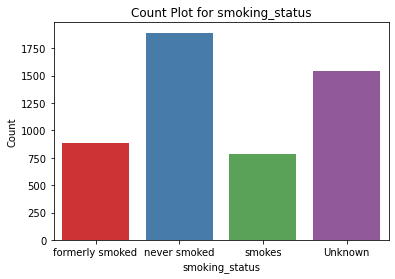

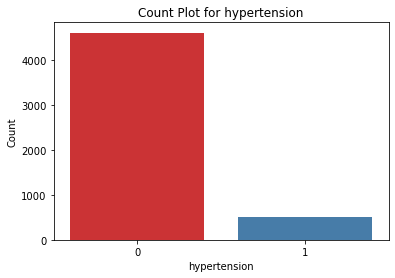

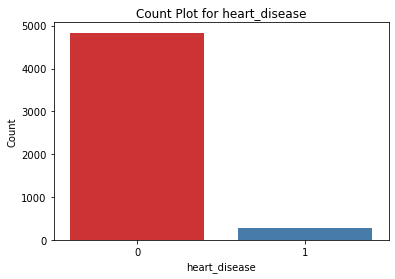

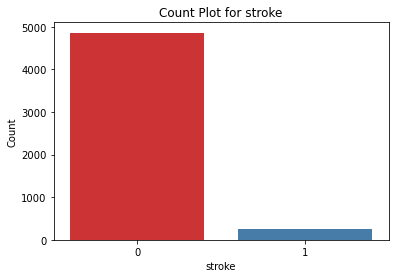

In [26]:
for cols in df_cat.columns:
    countplots = sns.countplot(x=df_cat[cols], data=df_cat, palette='Set1')
    plt.xlabel(cols)
    plt.ylabel('Count')
    plt.title('Count Plot for ' + cols)
    plt.show()

Inference: The dataset is imbalanced

###### Displaying the cardinality and unique categories of each categroical feature

In [27]:
for cols in df_cat.columns:
    print("Number of unique categories in df[{}] are {}".format(cols,  df[cols].nunique()))
    print("Unique categories in df[{}] are {}".format(cols, df[cols].unique()))
    print("\n")

Number of unique categories in df[gender] are 3
Unique categories in df[gender] are ['Male' 'Female' 'Other']


Number of unique categories in df[ever_married] are 2
Unique categories in df[ever_married] are ['Yes' 'No']


Number of unique categories in df[work_type] are 5
Unique categories in df[work_type] are ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Number of unique categories in df[Residence_type] are 2
Unique categories in df[Residence_type] are ['Urban' 'Rural']


Number of unique categories in df[smoking_status] are 4
Unique categories in df[smoking_status] are ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Number of unique categories in df[hypertension] are 2
Unique categories in df[hypertension] are [0 1]


Number of unique categories in df[heart_disease] are 2
Unique categories in df[heart_disease] are [1 0]


Number of unique categories in df[stroke] are 2
Unique categories in df[stroke] are [1 0]




###### Visualizing the dataset using the target variable

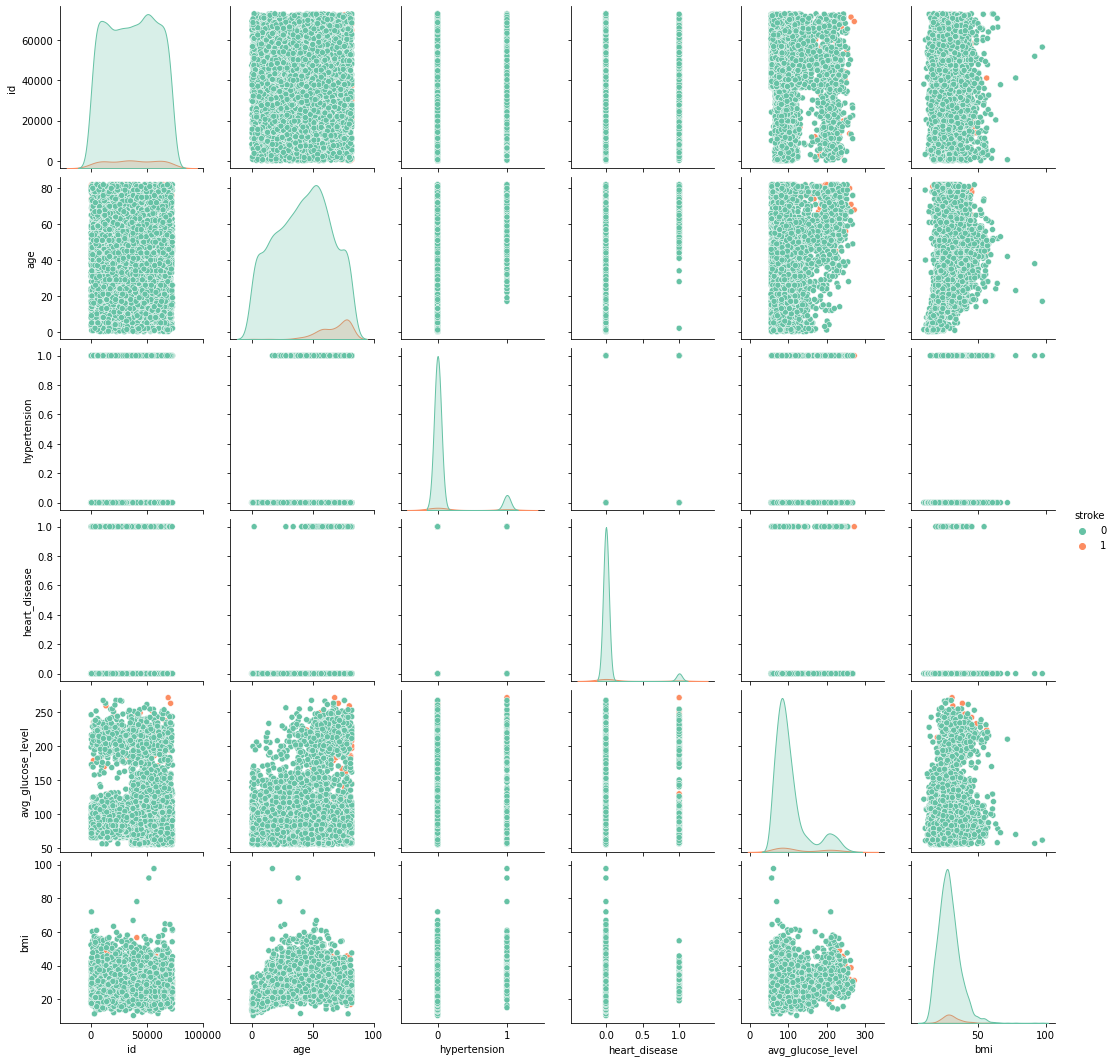

In [28]:
sns.pairplot(df, hue='stroke', palette='Set2')

###### Separating the dataset into input and target variables 

In [29]:
# Input DataFrame
X=df.iloc[:,1:-1]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [30]:
# Target DataFrame
Y=df.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

###### Splitting the dataset into training and testing data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Step 4 : Feature Engineering 
This step involves cleaning and processing the raw data before feeding it to the model.

#### Feature Engineering on Training Data

In [32]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,Female,36.0,0,0,Yes,Private,Rural,67.29,36.7,formerly smoked
2277,Female,34.0,0,0,Yes,Private,Rural,83.53,48.5,formerly smoked
3002,Male,60.0,0,0,Yes,Private,Rural,65.16,30.8,never smoked
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked
2825,Male,76.0,0,0,Yes,Private,Urban,58.65,25.6,smokes


In [33]:
X_train.shape

(4088, 10)

<br> Checking and imputing NaN values

In [34]:
for cols in X_train.columns:
    print(" NaN values in " + cols + " = " + str (X_train[cols].isnull().sum()))

 NaN values in gender = 0
 NaN values in age = 0
 NaN values in hypertension = 0
 NaN values in heart_disease = 0
 NaN values in ever_married = 0
 NaN values in work_type = 0
 NaN values in Residence_type = 0
 NaN values in avg_glucose_level = 0
 NaN values in bmi = 160
 NaN values in smoking_status = 0


<AxesSubplot:>

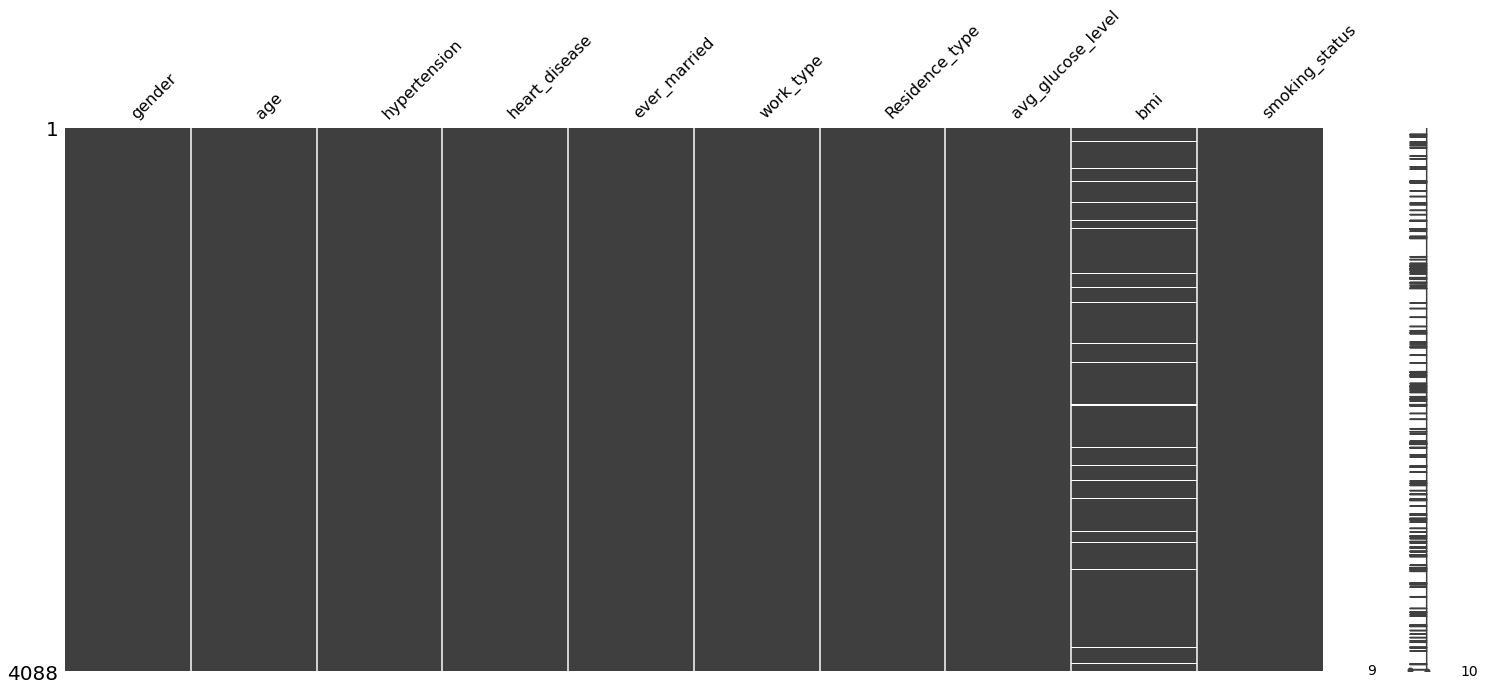

In [35]:
msno.matrix(X_train)

In [36]:
median = X_train['bmi'].median()
X_train['bmi'] = X_train['bmi'].replace(np.NaN, median)

In [37]:
for cols in X_train.columns:
    print(" NaN values in " + cols + " = " + str (X_train[cols].isnull().sum()))

 NaN values in gender = 0
 NaN values in age = 0
 NaN values in hypertension = 0
 NaN values in heart_disease = 0
 NaN values in ever_married = 0
 NaN values in work_type = 0
 NaN values in Residence_type = 0
 NaN values in avg_glucose_level = 0
 NaN values in bmi = 0
 NaN values in smoking_status = 0


<AxesSubplot:>

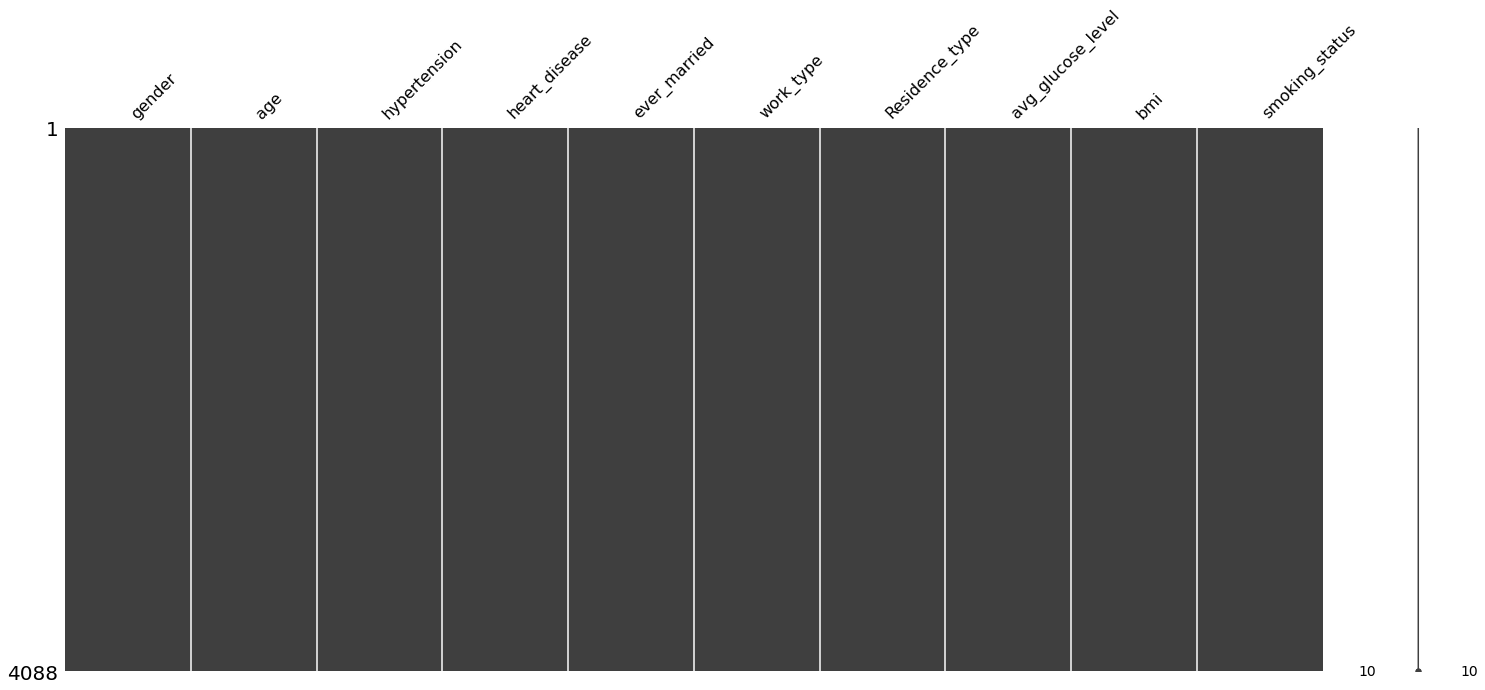

In [38]:
msno.matrix(X_train)

In [39]:
# Selecting numerical features
num_features = [features for features in X_train.columns if X_train[features].dtypes != 'O']

In [40]:
num_features.remove('hypertension')
num_features.remove('heart_disease')

In [41]:
num_features

['age', 'avg_glucose_level', 'bmi']

In [42]:
# Selecting categorical features
cat_features = [features for features in X_train.columns if X_train[features].dtypes == 'O']

In [43]:
cat_features.append('hypertension')
cat_features.append('heart_disease')

In [44]:
cat_features

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease']

Checking the distribution of the data

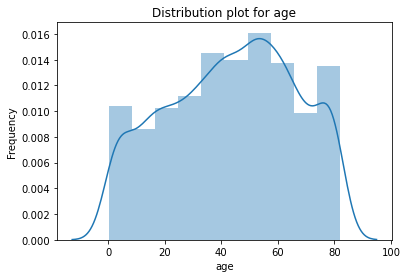

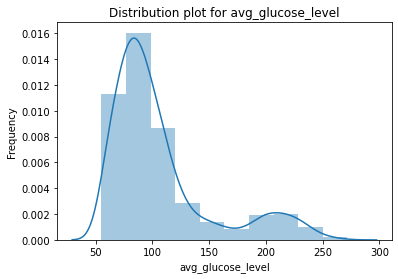

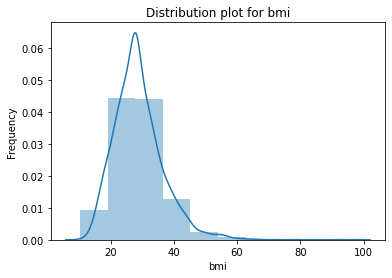

In [45]:
for cols in num_features:
    distributionplot = sns.distplot(a=X_train[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

###### Detecting outliers using Boxplot and Whisker method

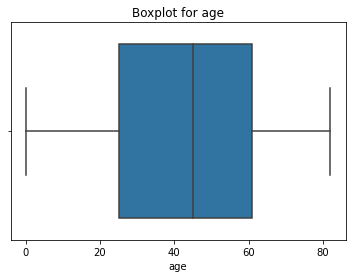

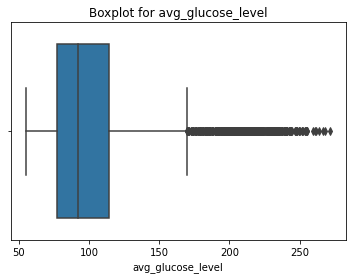

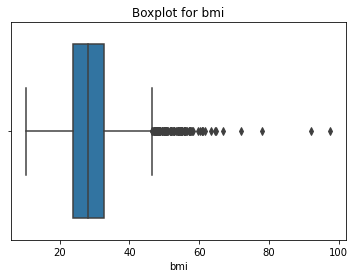

In [46]:
for cols in num_features:
    bp = sns.boxplot(X_train[cols])
    plt.xlabel(cols)
    plt.title('Boxplot for ' + cols)
    plt.show()

Text(0.5, 1.0, 'Outlier Detection')

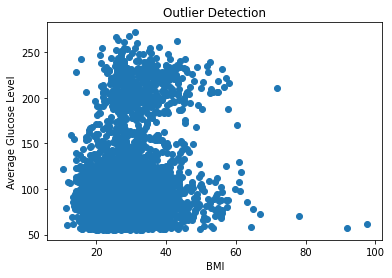

In [47]:
#Visualizing outliers using Scatter Plot
plt.scatter(X_train['bmi'],X_train['avg_glucose_level'])
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Outlier Detection')

###### Handling the outliers using quantile-based Capping and Flooring technique

In [48]:
upper_limit = X_train['bmi'].quantile(0.99)
lower_limit = X_train['bmi'].quantile(0.01)
X_train['bmi'] = np.where(X_train['bmi'] >= upper_limit, upper_limit,
        np.where(X_train['bmi'] <= lower_limit, lower_limit, X_train['bmi']))

In [49]:
upper_limit = X_train['avg_glucose_level'].quantile(0.99)
lower_limit = X_train['avg_glucose_level'].quantile(0.01)
X_train['avg_glucose_level'] = np.where(X_train['avg_glucose_level'] >= upper_limit, upper_limit,
        np.where(X_train['avg_glucose_level'] <= lower_limit, lower_limit, X_train['avg_glucose_level']))

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

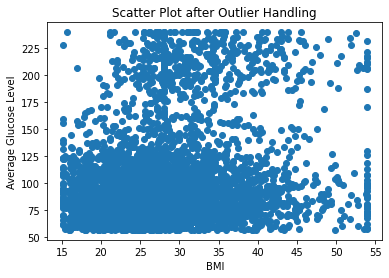

In [50]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(X_train['bmi'],X_train['avg_glucose_level'])
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Scatter Plot after Outlier Handling')

###### Encoding the categorical features into numerical features

In [51]:
X_train[cat_features].head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
3029,Female,Yes,Private,Rural,formerly smoked,0,0
2277,Female,Yes,Private,Rural,formerly smoked,0,0
3002,Male,Yes,Private,Rural,never smoked,0,0
246,Female,Yes,Self-employed,Rural,formerly smoked,0,0
2825,Male,Yes,Private,Urban,smokes,0,0


In [52]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
l2 = LabelEncoder()
l3 = LabelEncoder()
l4 = LabelEncoder()
l5 = LabelEncoder()

In [53]:
X_train['gender'] = l1.fit_transform(X_train['gender'])
X_train['ever_married'] = l2.fit_transform(X_train['ever_married'])
X_train['work_type'] = l3.fit_transform(X_train['work_type'])
X_train['Residence_type'] = l4.fit_transform(X_train['Residence_type'])
X_train['smoking_status'] = l5.fit_transform(X_train['smoking_status'])

In [54]:
l1_name_mapping = dict(zip(l5.classes_, l5.transform(l5.classes_)))
print(l1_name_mapping)

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [55]:
for cols in cat_features:
    print("Unique features in " + cols + " are " + str(X_train[cols].unique()))

Unique features in gender are [0 1 2]
Unique features in ever_married are [1 0]
Unique features in work_type are [2 3 4 0 1]
Unique features in Residence_type are [0 1]
Unique features in smoking_status are [1 2 3 0]
Unique features in hypertension are [0 1]
Unique features in heart_disease are [0 1]


In [56]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,0,36.0,0,0,1,2,0,67.29,36.7,1
2277,0,34.0,0,0,1,2,0,83.53,48.5,1
3002,1,60.0,0,0,1,2,0,65.16,30.8,2
246,0,75.0,0,0,1,3,0,78.80,29.3,1
2825,1,76.0,0,0,1,2,1,58.65,25.6,3


#### Feature Engineering on Testing Data

In [57]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,Male,82.0,0,1,Yes,Private,Urban,144.90,26.4,smokes
380,Male,4.0,0,0,No,children,Rural,106.22,16.7,Unknown
3524,Male,58.0,0,0,Yes,Private,Urban,79.95,25.9,never smoked
352,Female,20.0,0,0,No,Private,Rural,96.57,34.1,never smoked
4927,Female,10.0,0,0,No,children,Rural,69.84,13.7,Unknown


In [58]:
X_test.shape

(1022, 10)

###### <br> Checking and imputing NaN values

In [59]:
for cols in X_test.columns:
    print(" NaN values in " + cols + " = " + str (X_test[cols].isnull().sum()))

 NaN values in gender = 0
 NaN values in age = 0
 NaN values in hypertension = 0
 NaN values in heart_disease = 0
 NaN values in ever_married = 0
 NaN values in work_type = 0
 NaN values in Residence_type = 0
 NaN values in avg_glucose_level = 0
 NaN values in bmi = 41
 NaN values in smoking_status = 0


In [60]:
X_test['bmi'] = X_test['bmi'].replace(np.NaN, median)

In [61]:
for cols in X_test.columns:
    print(" NaN values in " + cols + " = " + str (X_test[cols].isnull().sum()))

 NaN values in gender = 0
 NaN values in age = 0
 NaN values in hypertension = 0
 NaN values in heart_disease = 0
 NaN values in ever_married = 0
 NaN values in work_type = 0
 NaN values in Residence_type = 0
 NaN values in avg_glucose_level = 0
 NaN values in bmi = 0
 NaN values in smoking_status = 0


In [62]:
# Selecting numerical features
num_features_test = [features for features in X_test.columns if X_test[features].dtypes != 'O']

In [63]:
num_features_test.remove('hypertension')
num_features_test.remove('heart_disease')

In [64]:
num_features_test

['age', 'avg_glucose_level', 'bmi']

In [65]:
# Selecting categorical features
cat_features_test = [features for features in X_test.columns if X_test[features].dtypes == 'O']

In [66]:
cat_features_test.append('hypertension')
cat_features_test.append('heart_disease')

In [67]:
cat_features_test

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease']

###### Checking the distribution of the data

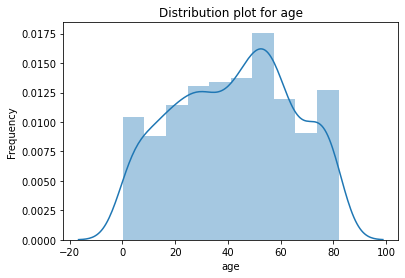

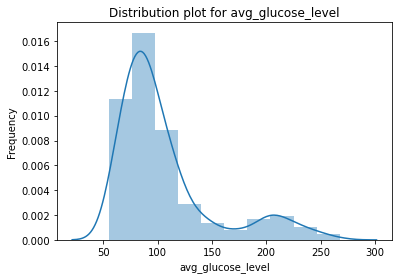

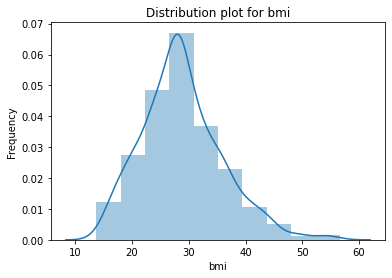

In [66]:
for cols in num_features_test:
    distributionplot = sns.distplot(a=X_test[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

###### Detecting outliers using Boxplot and Whisker method

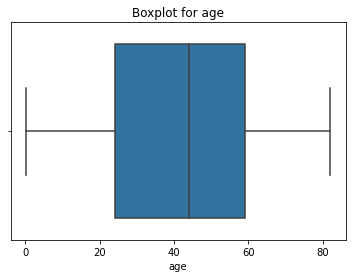

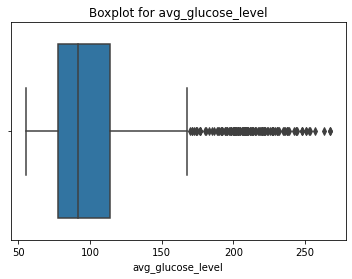

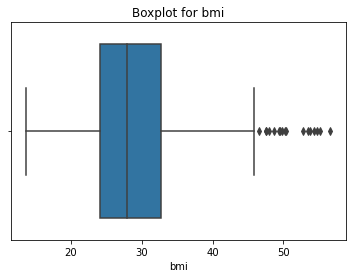

In [67]:
for cols in num_features_test:
    bp = sns.boxplot(X_test[cols])
    plt.xlabel(cols)
    plt.title('Boxplot for ' + cols)
    plt.show()

###### Handling the outliers using quantile-based Capping and Flooring technique

In [68]:
upper_limit = X_test['bmi'].quantile(0.99)
lower_limit = X_test['bmi'].quantile(0.01)
X_test['bmi'] = np.where(X_test['bmi'] >= upper_limit, upper_limit,
        np.where(X_test['bmi'] <= lower_limit, lower_limit, X_test['bmi']))

In [69]:
upper_limit = X_test['avg_glucose_level'].quantile(0.99)
lower_limit = X_test['avg_glucose_level'].quantile(0.01)
X_test['avg_glucose_level'] = np.where(X_test['avg_glucose_level'] >= upper_limit, upper_limit,
        np.where(X_test['avg_glucose_level'] <= lower_limit, lower_limit, X_test['avg_glucose_level']))

###### Encoding the categorical features into numerical features

In [70]:
X_test[cat_features].head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
42,Male,Yes,Private,Urban,smokes,0,1
380,Male,No,children,Rural,Unknown,0,0
3524,Male,Yes,Private,Urban,never smoked,0,0
352,Female,No,Private,Rural,never smoked,0,0
4927,Female,No,children,Rural,Unknown,0,0


In [71]:
X_test['gender'] = l1.transform(X_test['gender'])
X_test['ever_married'] = l2.transform(X_test['ever_married'])
X_test['work_type'] = l3.transform(X_test['work_type'])
X_test['Residence_type'] = l4.transform(X_test['Residence_type'])
X_test['smoking_status'] = l5.transform(X_test['smoking_status'])

In [72]:
for cols in cat_features_test:
    print("Unique features in " + cols + " are " + str(X_test[cols].unique()))

Unique features in gender are [1 0]
Unique features in ever_married are [1 0]
Unique features in work_type are [2 4 0 3 1]
Unique features in Residence_type are [1 0]
Unique features in smoking_status are [3 0 2 1]
Unique features in hypertension are [0 1]
Unique features in heart_disease are [1 0]


In [73]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,1,82.0,0,1,1,2,1,144.90,26.400,3
380,1,4.0,0,0,0,4,0,106.22,16.700,0
3524,1,58.0,0,0,1,2,1,79.95,25.900,2
352,0,20.0,0,0,0,2,0,96.57,34.100,2
4927,0,10.0,0,0,0,4,0,69.84,15.621,0


###### Feature Scaling (standardizing the features)

In [74]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.19359800e+00,  1.70152638e+00, -3.32063487e-01, ...,
         8.61298978e-01, -3.21499629e-01,  1.51121730e+00],
       [ 1.19359800e+00, -1.74025658e+00, -3.32063487e-01, ...,
         1.30948006e-03, -1.61104506e+00, -1.28799263e+00],
       [ 1.19359800e+00,  6.42516237e-01, -3.32063487e-01, ...,
        -5.82763015e-01, -3.87971043e-01,  5.78147322e-01],
       ...,
       [ 1.19359800e+00,  3.77763701e-01, -3.32063487e-01, ...,
        -8.17992820e-01,  9.81340089e-01, -1.28799263e+00],
       [ 1.19359800e+00,  1.52502469e+00, -3.32063487e-01, ...,
         2.92567397e+00, -1.08791103e-01, -3.54922655e-01],
       [-8.36114403e-01, -3.72368483e-01, -3.32063487e-01, ...,
        -5.08947991e-01, -1.19892230e+00, -3.54922655e-01]])

## Step 5 : Feature Selection
This step involves the selection of critical features while dropping the unnecessary features that contribute to the output variable.

<AxesSubplot:>

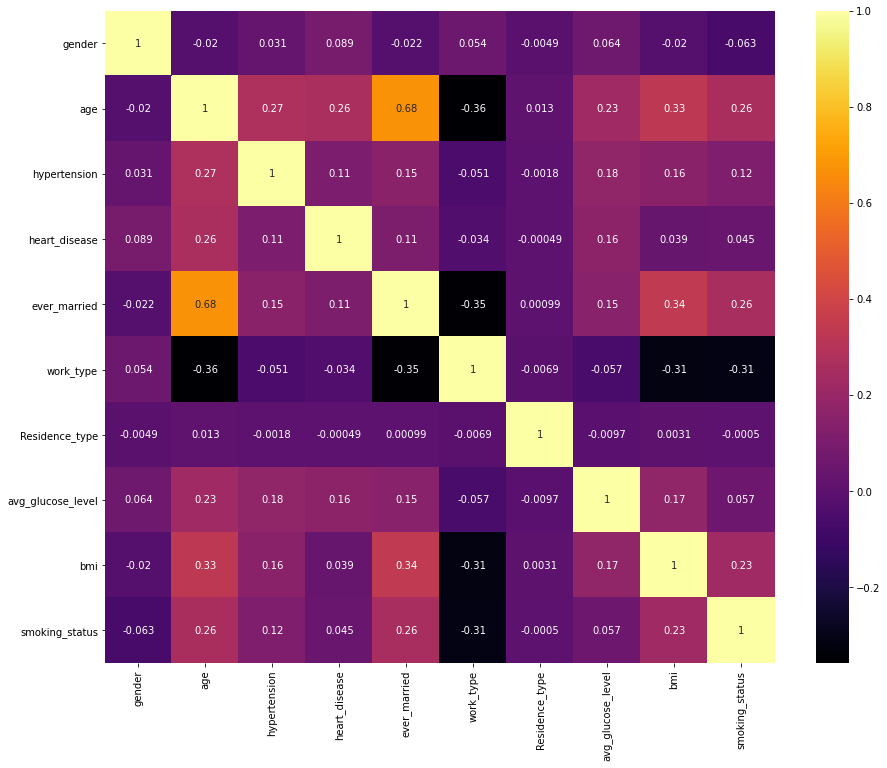

In [75]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train.corr(), annot=True, cmap="inferno")

In [76]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr             

In [77]:
corr_features = correlation(X_train, 0.85)

In [78]:
corr_features

set()

Inference: The independent features are not highly correlated, hence no feature should be dropped

In [79]:
# Feature Selection based on importance of the features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, Y_train)
feature_imp = model.feature_importances_

In [80]:
feature_imp = feature_imp*100

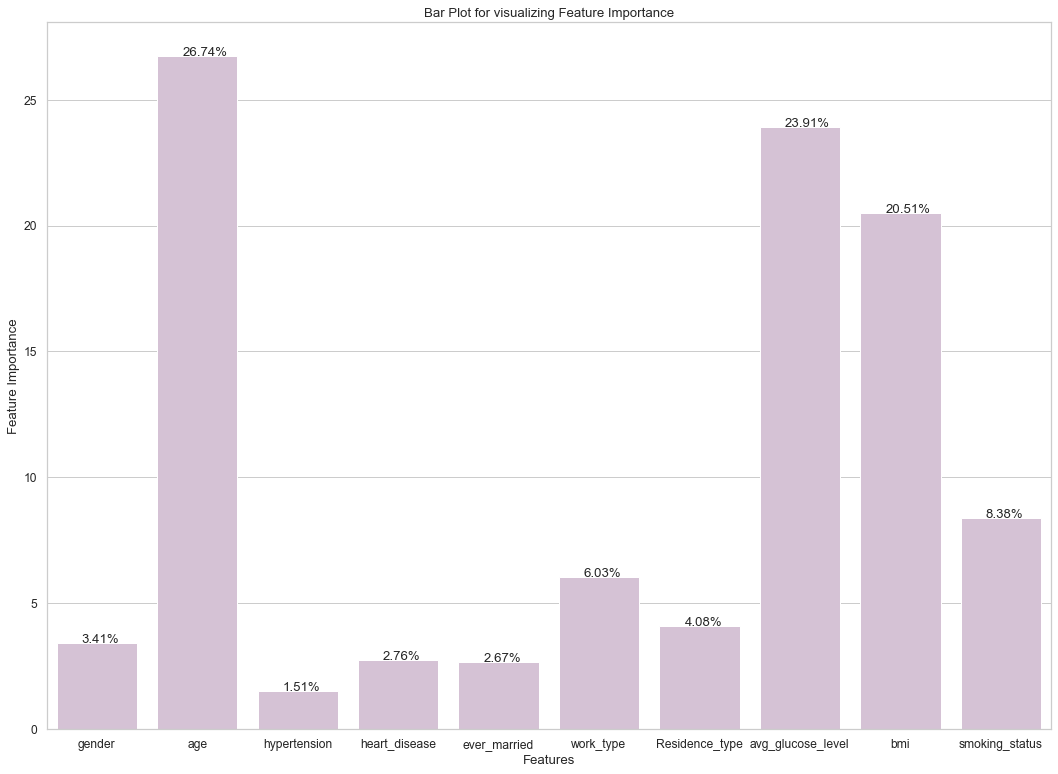

In [81]:
# Visualizing the importance of input features
plt.figure(figsize=(18,13))
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
barplot_feature_imp = sns.barplot(X_train.columns, feature_imp ,color='thistle')

barplot_feature_imp.set_xlabel('Features')
barplot_feature_imp.set_ylabel('Feature Importance')
barplot_feature_imp.set_title('Bar Plot for visualizing Feature Importance')

for p in barplot_feature_imp.patches:
    barplot_feature_imp.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

Inference: Every independent feature contributes to the target feature. 'age' is the most important feature while 'ever_married' contributes least to the target variable

##### Handling the imbalanced dataset
Applying the SMOTE technique to handle the unbalanced dataset

In [82]:
from collections import Counter
print('Original dataset target feature category counter {}'.format(Counter(Y_train)))

Original dataset target feature category counter Counter({0: 3893, 1: 195})


In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, Y_train = sm.fit_resample(X_train,Y_train)
print('Resampled dataset target feature category counter {}'.format(Counter(Y_train)))

Resampled dataset target feature category counter Counter({0: 3893, 1: 3893})


## Step 6 : Model Building and Evaluation
In this study, several Classification Machine Learning Models are trained using the training dataset. Then, the model is used for prediction using the the testing dataset. Further, the model is evaluated using various evaluation metrics from classification like Confusion Matrix.

0    3893
1    3893
Name: stroke, dtype: int64

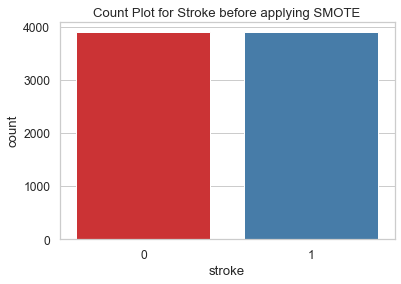

In [84]:
cp=sns.countplot(Y_train, palette="Set1")
plt.title("Count Plot for Stroke before applying SMOTE")

Y_train.value_counts()

### 1. Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression()

model_logistic.fit(X_train,Y_train)

Y_pred_train_logistic=model_logistic.predict(X_train)
Y_pred_test_logistic=model_logistic.predict(X_test)
Y_proba_test_logistic = model_logistic.predict_proba(X_test)

###### Evaluating the Logistic Regression model

Train accuracy: 0.8013100436681223
Test accuracy: 0.776908023483366
Recall Score: 0.5
F2-Score: 0.30405405405405406
ROC AUC Score: 0.7321510560146924

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       968
           1       0.12      0.50      0.19        54

    accuracy                           0.78      1022
   macro avg       0.54      0.65      0.53      1022
weighted avg       0.92      0.78      0.83      1022


Confusion Matrix:



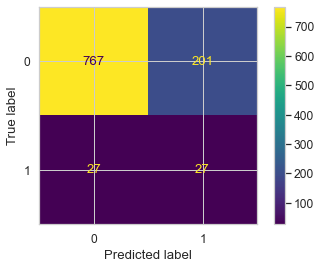

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score, roc_curve, RocCurveDisplay, plot_confusion_matrix

print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_logistic)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_logistic)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_logistic)))
print('F2-Score: ' + str(fbeta_score(Y_test, Y_pred_test_logistic, beta=2)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_logistic[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_logistic))

print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_logistic,X_test, Y_test) 

###### ROC curve for Logistic Regression model

Text(0.5, 1.0, 'ROC curve for Logistic Regression')

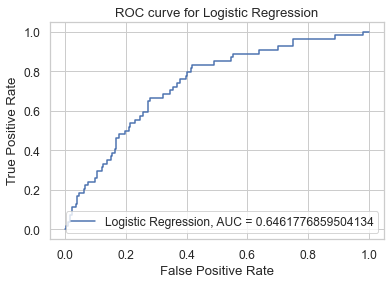

In [87]:
fpr_logistic, tpr_logistic, _ = roc_curve(Y_test, Y_proba_test_logistic[:,1])
plt.plot(fpr_logistic, tpr_logistic, label="Logistic Regression, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_logistic)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')

### 2. K Nearest Neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2)

model_knn.fit(X_train,Y_train)

Y_pred_train_knn=model_knn.predict(X_train)
Y_pred_test_knn=model_knn.predict(X_test)
Y_proba_test_knn = model_knn.predict_proba(X_test)

###### Evaluating the K Nearest Neighbor model

Train accuracy: 0.9920369894682763
Test accuracy: 0.8767123287671232
Recall Score: 0.2962962962962963
F1-Score: 0.20253164556962028
ROC AUC Score: 0.6511899295990204

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       968
           1       0.15      0.30      0.20        54

    accuracy                           0.88      1022
   macro avg       0.56      0.60      0.57      1022
weighted avg       0.92      0.88      0.89      1022


Confusion Matrix:



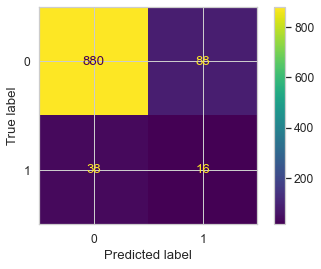

In [89]:
from sklearn.metrics import f1_score
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_knn)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_knn)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_knn)))
print('F1-Score: ' + str(f1_score(Y_test, Y_pred_test_knn)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_knn[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_knn))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_knn,X_test, Y_test) 

###### ROC curve for K Nearest Neighbors model

Text(0.5, 1.0, 'ROC curve for K Nearest Neighbor')

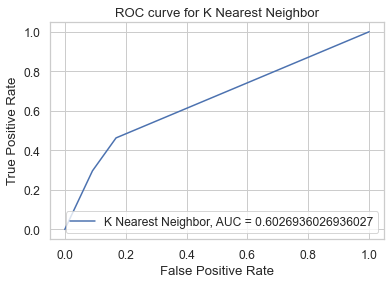

In [90]:
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_proba_test_knn[:,1])
plt.plot(fpr_knn, tpr_knn, label="K Nearest Neighbor, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_knn)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for K Nearest Neighbor')

### 3. Decision Tree Classifier

In [91]:
from sklearn import tree
model_decision_tree = tree.DecisionTreeClassifier()

model_decision_tree.fit(X_train,Y_train)

Y_pred_train_decision_tree = model_decision_tree.predict(X_train)
Y_pred_test_decision_tree = model_decision_tree.predict(X_test)
Y_proba_test_decision_tree = model_decision_tree.predict_proba(X_test)

[Text(0.3961657907552912, 0.9807692307692307, 'X[1] <= 53.0\ngini = 0.5\nsamples = 7786\nvalue = [3893, 3893]'),
 Text(0.1016704736020355, 0.9423076923076923, 'X[1] <= 45.007\ngini = 0.227\nsamples = 2941\nvalue = [2557, 384]'),
 Text(0.03533221534725033, 0.9038461538461539, 'X[1] <= 37.275\ngini = 0.091\nsamples = 2185\nvalue = [2081, 104]'),
 Text(0.009252298617937894, 0.8653846153846154, 'X[1] <= 33.191\ngini = 0.02\nsamples = 1616\nvalue = [1600, 16]'),
 Text(0.0037009194471751576, 0.8269230769230769, 'X[1] <= 31.5\ngini = 0.003\nsamples = 1400\nvalue = [1398, 2]'),
 Text(0.0018504597235875788, 0.7884615384615384, 'gini = 0.0\nsamples = 1296\nvalue = [1296, 0]'),
 Text(0.005551379170762737, 0.7884615384615384, 'X[7] <= 76.876\ngini = 0.038\nsamples = 104\nvalue = [102, 2]'),
 Text(0.0037009194471751576, 0.75, 'X[7] <= 75.9\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(0.0018504597235875788, 0.7115384615384616, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.0055513791

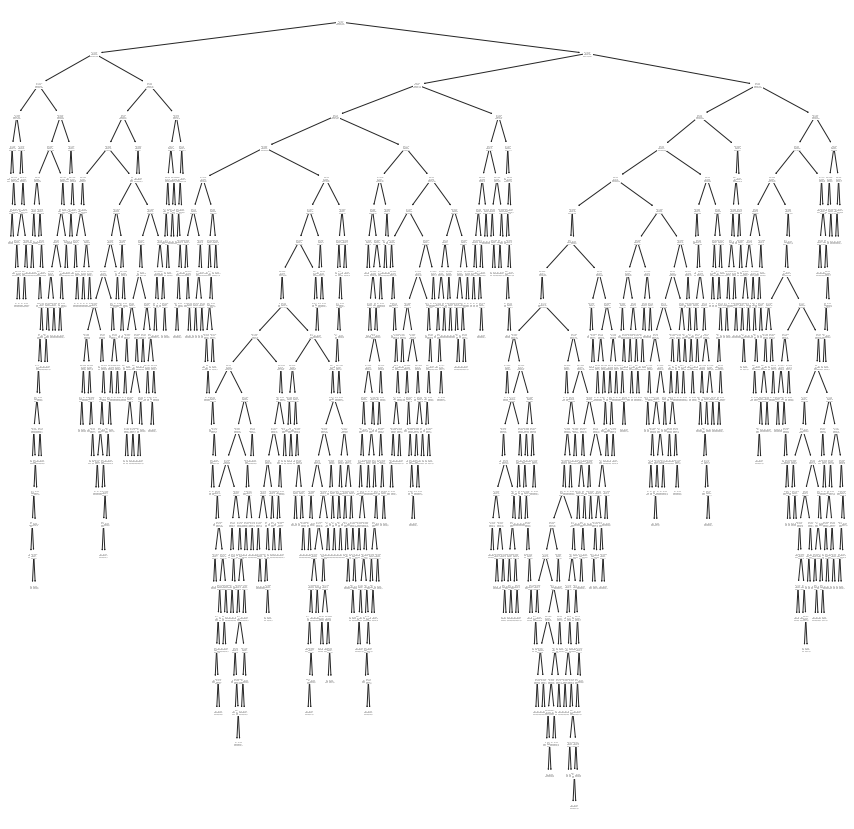

In [92]:
plt.figure(figsize=(15,15))
tree.plot_tree(model_decision_tree)

###### Evaluating the Decision Tree Classifier model

Train accuracy: 1.0
Test accuracy: 0.8884540117416829
Recall Score: 0.2222222222222222
ROC AUC Score: 0.5739210284664831

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       968
           1       0.14      0.22      0.17        54

    accuracy                           0.89      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.91      0.89      0.90      1022


Confusion Matrix:



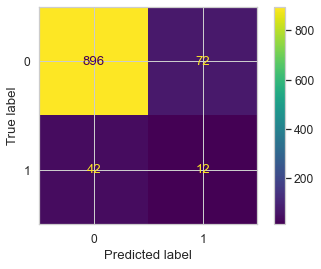

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score, roc_curve, RocCurveDisplay, plot_confusion_matrix

print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_decision_tree)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_decision_tree)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_decision_tree)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_decision_tree[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_decision_tree))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_decision_tree,X_test, Y_test) 

###### ROC curve for Decision Tree Classifier model

Text(0.5, 1.0, 'ROC curve for Decision Tree')

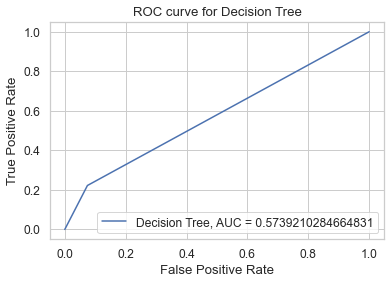

In [94]:
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(Y_test, Y_proba_test_decision_tree[:,1])
plt.plot(fpr_decision_tree, tpr_decision_tree, label="Decision Tree, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_decision_tree)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree')

### 4. Support Vector Classifier

In [95]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear', probability = True)

model_svm.fit(X_train,Y_train)

Y_pred_train_svm = model_svm.predict(X_train)
Y_pred_test_svm = model_svm.predict(X_test)
Y_proba_test_svm = model_svm.predict_proba(X_test)

###### Evaluating the Support Vector Classifier model

Train accuracy: 0.8034934497816594
Test accuracy: 0.773972602739726
Recall Score: 0.5370370370370371
ROC AUC Score: 0.757652280379553

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       968
           1       0.12      0.54      0.20        54

    accuracy                           0.77      1022
   macro avg       0.55      0.66      0.53      1022
weighted avg       0.92      0.77      0.83      1022


Confusion Matrix:



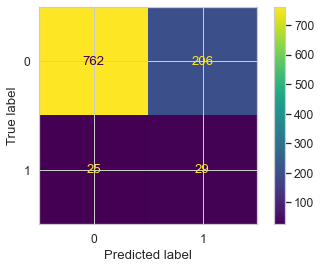

In [96]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_svm)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_svm)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_svm)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_svm[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_svm))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_svm, X_test, Y_test) 

###### ROC curve for Support Vector Classifier model

Text(0.5, 1.0, 'ROC curve for Support Vector Machine')

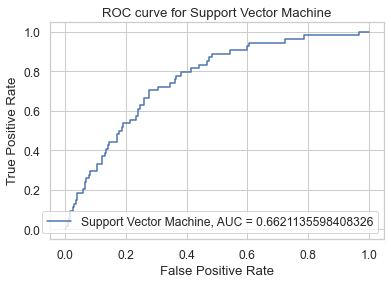

In [97]:
fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_proba_test_svm[:,1])
plt.plot(fpr_svm, tpr_svm, label="Support Vector Machine, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_svm)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Support Vector Machine')

### 5. Gaussian Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()

model_naive_bayes.fit(X_train,Y_train)

Y_pred_train_naive_bayes = model_naive_bayes.predict(X_train)
Y_pred_test_naive_bayes = model_naive_bayes.predict(X_test)
Y_proba_test_naive_bayes = model_naive_bayes.predict_proba(X_test)

###### Evaluating the Gaussian Naive Bayes model

Train accuracy: 0.7995119445157975
Test accuracy: 0.7544031311154599
Recall Score: 0.5925925925925926
ROC AUC Score: 0.7593740434649525

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       968
           1       0.12      0.59      0.20        54

    accuracy                           0.75      1022
   macro avg       0.55      0.68      0.53      1022
weighted avg       0.93      0.75      0.82      1022


Confusion Matrix:



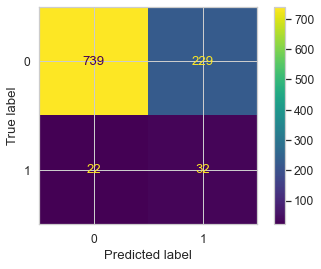

In [99]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_naive_bayes)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_naive_bayes)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_naive_bayes)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_naive_bayes[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_naive_bayes))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_naive_bayes,X_test, Y_test) 

###### ROC curve for Gaussian Naive Bayes

Text(0.5, 1.0, 'ROC curve for Naive Bayes')

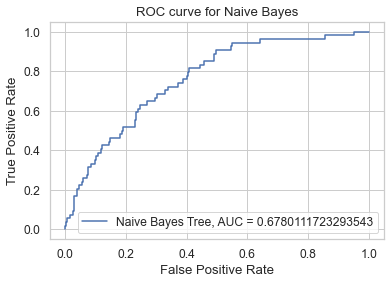

In [100]:
fpr_naive_bayes, tpr_naive_bayes, _ = roc_curve(Y_test, Y_proba_test_naive_bayes[:,1])
plt.plot(fpr_naive_bayes, tpr_naive_bayes, label="Naive Bayes Tree, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_naive_bayes)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Naive Bayes')

### 6. Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=20,random_state=0)

model_random_forest.fit(X_train,Y_train)

Y_pred_train_random_forest = model_random_forest.predict(X_train)
Y_pred_test_random_forest = model_random_forest.predict(X_test)
Y_proba_test_random_forest = model_random_forest.predict_proba(X_test)

###### Evaluating the Random Forest Classifier model

Train accuracy: 0.99948625738505
Test accuracy: 0.9031311154598826
Recall Score: 0.12962962962962962
ROC AUC Score: 0.7136516681971228

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.12      0.13      0.12        54

    accuracy                           0.90      1022
   macro avg       0.53      0.54      0.54      1022
weighted avg       0.91      0.90      0.91      1022


Confusion Matrix:



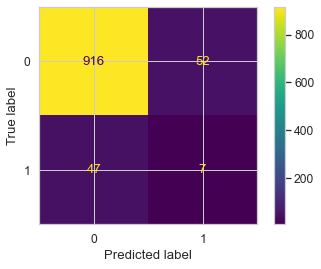

In [102]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_random_forest)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_random_forest)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_random_forest)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_random_forest[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_random_forest))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_random_forest,X_test, Y_test) 

###### ROC curve for Random Forest Classifier

Text(0.5, 1.0, 'ROC curve for Random Forest')

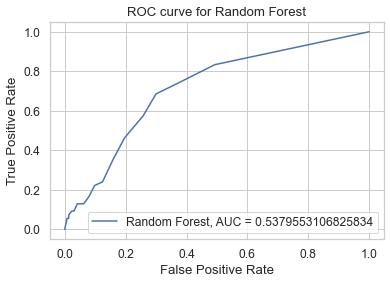

In [103]:
fpr_random_forest, tpr_random_forest, _ = roc_curve(Y_test, Y_proba_test_random_forest[:,1])
plt.plot(fpr_random_forest, tpr_random_forest, label="Random Forest, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_random_forest)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')

### 7. AdaBoost

In [104]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)

model_adaboost.fit(X_train,Y_train)

Y_pred_train_adaboost = model_adaboost.predict(X_train)
Y_pred_test_adaboost = model_adaboost.predict(X_test)
Y_proba_test_adaboost = model_adaboost.predict_proba(X_test)

###### Evaluating the AdaBoost model

Train accuracy: 0.8593629591574621
Test accuracy: 0.8111545988258317
Recall Score: 0.42592592592592593
ROC AUC Score: 0.749521732476278

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       968
           1       0.12      0.43      0.19        54

    accuracy                           0.81      1022
   macro avg       0.54      0.63      0.54      1022
weighted avg       0.92      0.81      0.86      1022


Confusion Matrix:



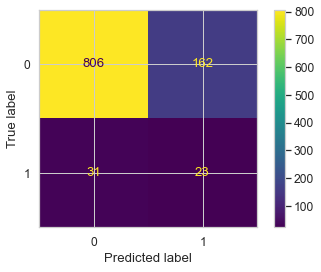

In [105]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_adaboost)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_adaboost)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_adaboost)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_adaboost[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_adaboost))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_adaboost,X_test, Y_test)

###### ROC curve for AdaBoost model

Text(0.5, 1.0, 'ROC curve for Ada Boost')

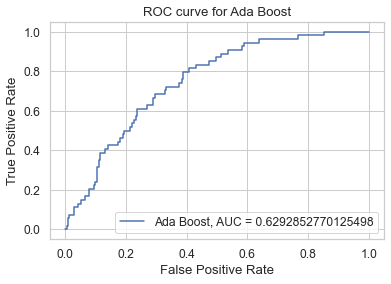

In [106]:
fpr_adaboost, tpr_adaboost, _ = roc_curve(Y_test, Y_proba_test_adaboost[:,1])
plt.plot(fpr_adaboost, tpr_adaboost, label="Ada Boost, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_adaboost)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Ada Boost')

### 8. XGBoost

In [107]:
import xgboost as xgb
model_xgboost = xgb.XGBClassifier(learning_rate=0.1, n_estimators=500)

model_xgboost.fit(X_train,Y_train)

Y_pred_train_xgboost = model_xgboost.predict(X_train)
Y_pred_test_xgboost = model_xgboost.predict(X_test)
Y_proba_test_xgboost = model_xgboost.predict_proba(X_test)

###### Evaluating the XGBoost model

Train accuracy: 0.9991009504238376
Test accuracy: 0.9275929549902152
Recall Score: 0.16666666666666666
ROC AUC Score: 0.7582070707070706

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       968
           1       0.24      0.17      0.20        54

    accuracy                           0.93      1022
   macro avg       0.60      0.57      0.58      1022
weighted avg       0.92      0.93      0.92      1022


Confusion Matrix:



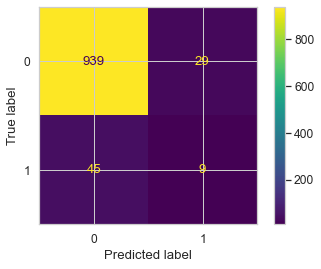

In [108]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_xgboost)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_xgboost)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_xgboost)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_xgboost[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_xgboost))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_xgboost,X_test, Y_test)

###### ROC curve for XGBoost model

Text(0.5, 1.0, 'ROC curve for XGBoost')

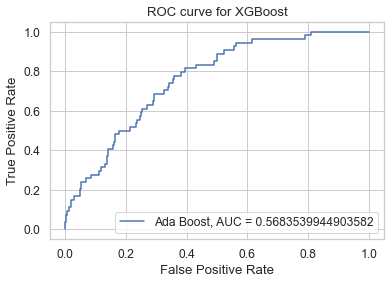

In [109]:
fpr_xgboost, tpr_xgboost, _ = roc_curve(Y_test, Y_proba_test_xgboost[:,1])
plt.plot(fpr_xgboost, tpr_xgboost, label="Ada Boost, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_xgboost)))
plt.legend(loc = 'lower right')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBoost')

## Comparing the classification Machine Learning Algorithms

###### Comparing the train accuracies of different classification algorithms

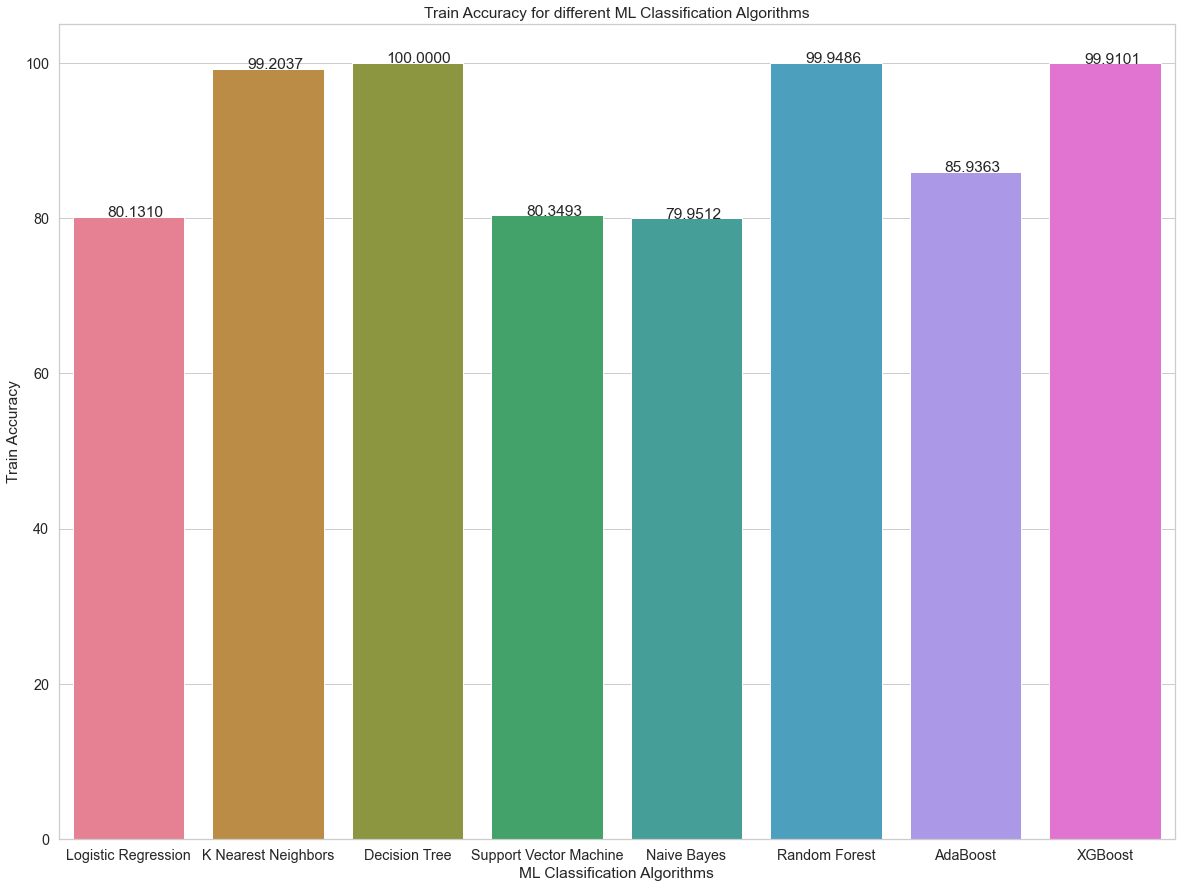

In [110]:
list_of_algos = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Support Vector Machine', 'Naive Bayes', 
                 'Random Forest', 'AdaBoost', 'XGBoost']
train_accuracy_list = [accuracy_score(Y_train,Y_pred_train_logistic)*100, accuracy_score(Y_train,Y_pred_train_knn)*100, 
               accuracy_score(Y_train,Y_pred_train_decision_tree)*100, accuracy_score(Y_train,Y_pred_train_svm)*100, 
               accuracy_score(Y_train,Y_pred_train_naive_bayes)*100, accuracy_score(Y_train,Y_pred_train_random_forest)*100, 
               accuracy_score(Y_train,Y_pred_train_adaboost)*100, accuracy_score(Y_train,Y_pred_train_xgboost)*100]

plt.figure(figsize = (20,15))
sns.set(font_scale = 1.3)
sns.set_style('whitegrid')
barplot_train = sns.barplot(list_of_algos, train_accuracy_list, palette = "husl")

barplot_train.set_xlabel('ML Classification Algorithms')
barplot_train.set_ylabel('Train Accuracy')
barplot_train.set_title('Train Accuracy for different ML Classification Algorithms')

for p in barplot_train.patches:
    barplot_train.annotate("{:.4f}".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

###### Comparing the test accuracies of different classification algorithms

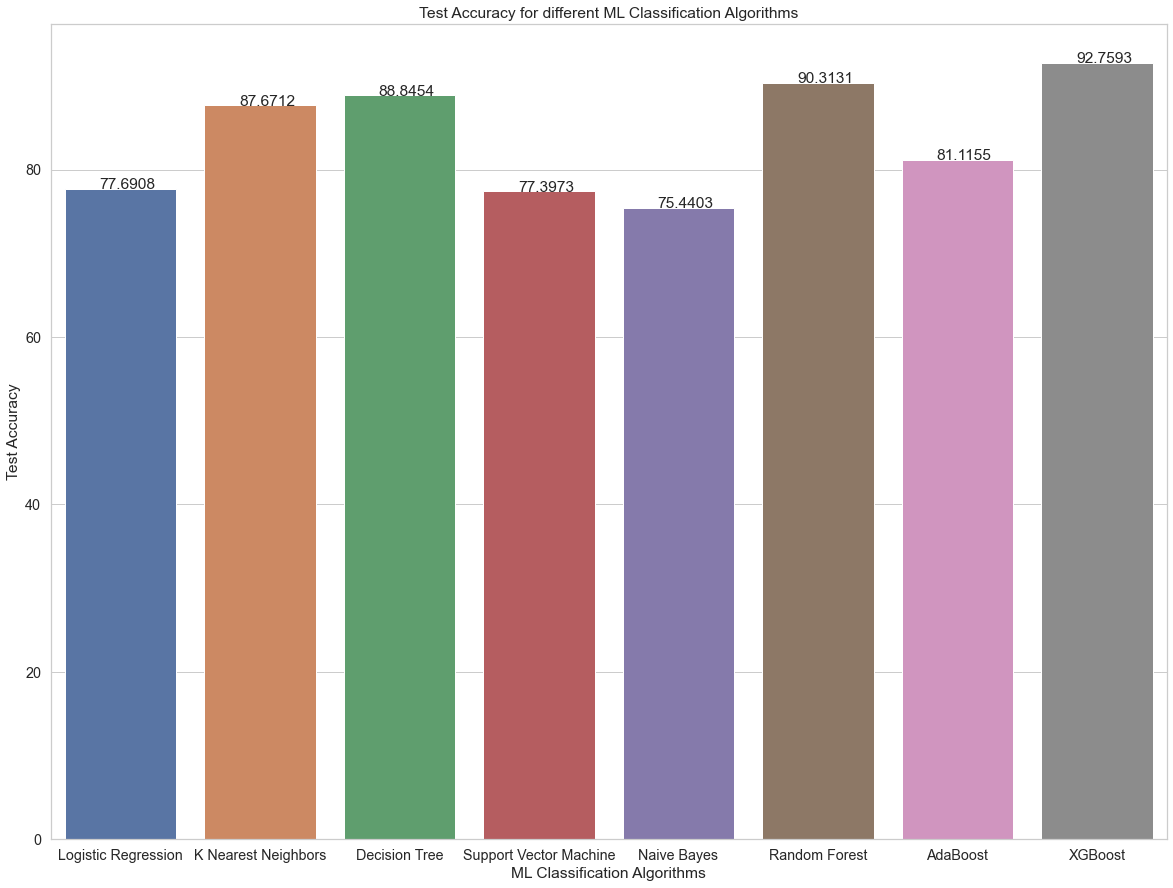

In [111]:
test_accuracy_list = [accuracy_score(Y_test,Y_pred_test_logistic)*100, accuracy_score(Y_test,Y_pred_test_knn)*100, 
               accuracy_score(Y_test,Y_pred_test_decision_tree)*100, accuracy_score(Y_test,Y_pred_test_svm)*100, 
               accuracy_score(Y_test,Y_pred_test_naive_bayes)*100, accuracy_score(Y_test,Y_pred_test_random_forest)*100, 
               accuracy_score(Y_test,Y_pred_test_adaboost)*100, accuracy_score(Y_test,Y_pred_test_xgboost)*100]

plt.figure(figsize = (20,15))
sns.set(font_scale = 1.3)
sns.set_style('whitegrid')
barplot_test = sns.barplot(list_of_algos,test_accuracy_list)

barplot_test.set_xlabel('ML Classification Algorithms')
barplot_test.set_ylabel('Test Accuracy')
barplot_test.set_title('Test Accuracy for different ML Classification Algorithms')

for p in barplot_test.patches:
    barplot_test.annotate("{:.4f}".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

###### Plotting the ROC curves of different classification algorithms and comparing their ROC-AUC score

Text(0.5, 1.0, 'ROC curves for different ML Classification Algorithms')

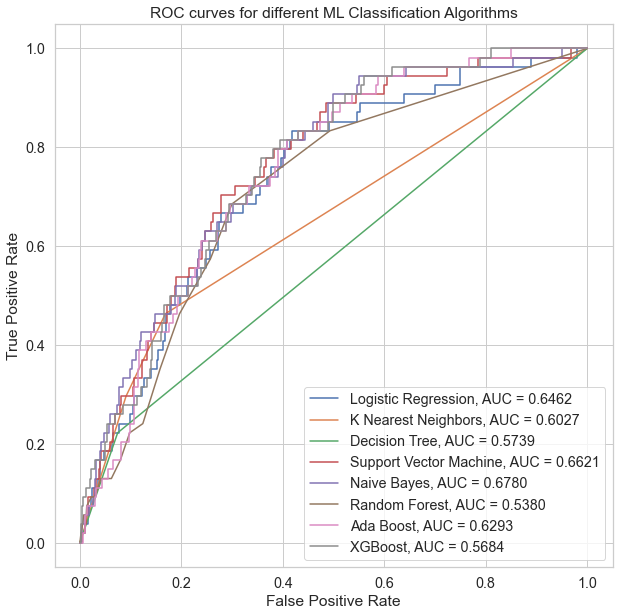

In [112]:
plt.figure(figsize=(10,10))
plt.plot(fpr_logistic, tpr_logistic, label="Logistic Regression, AUC = %.4f" % (roc_auc_score(Y_test, Y_pred_test_logistic)))
plt.plot(fpr_knn, tpr_knn, label="K Nearest Neighbors, AUC = %.4f" % (roc_auc_score(Y_test, Y_pred_test_knn)))
plt.plot(fpr_decision_tree, tpr_decision_tree, label="Decision Tree, AUC = %.4f" % (roc_auc_score(Y_test, Y_pred_test_decision_tree)))
plt.plot(fpr_svm, tpr_svm, label="Support Vector Machine, AUC = %.4f" % (roc_auc_score(Y_test, Y_pred_test_svm)))
plt.plot(fpr_naive_bayes, tpr_naive_bayes, label="Naive Bayes, AUC = %.4f" % (roc_auc_score(Y_test, Y_pred_test_naive_bayes)))
plt.plot(fpr_random_forest, tpr_random_forest, label="Random Forest, AUC = %.4f" % (roc_auc_score(Y_test, Y_pred_test_random_forest)))
plt.plot(fpr_adaboost, tpr_adaboost, label="Ada Boost, AUC = %.4f" % (roc_auc_score(Y_test, Y_pred_test_adaboost)))
plt.plot(fpr_xgboost, tpr_xgboost, label="XGBoost, AUC = %.4f" % (roc_auc_score(Y_test, Y_pred_test_xgboost)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for different ML Classification Algorithms')

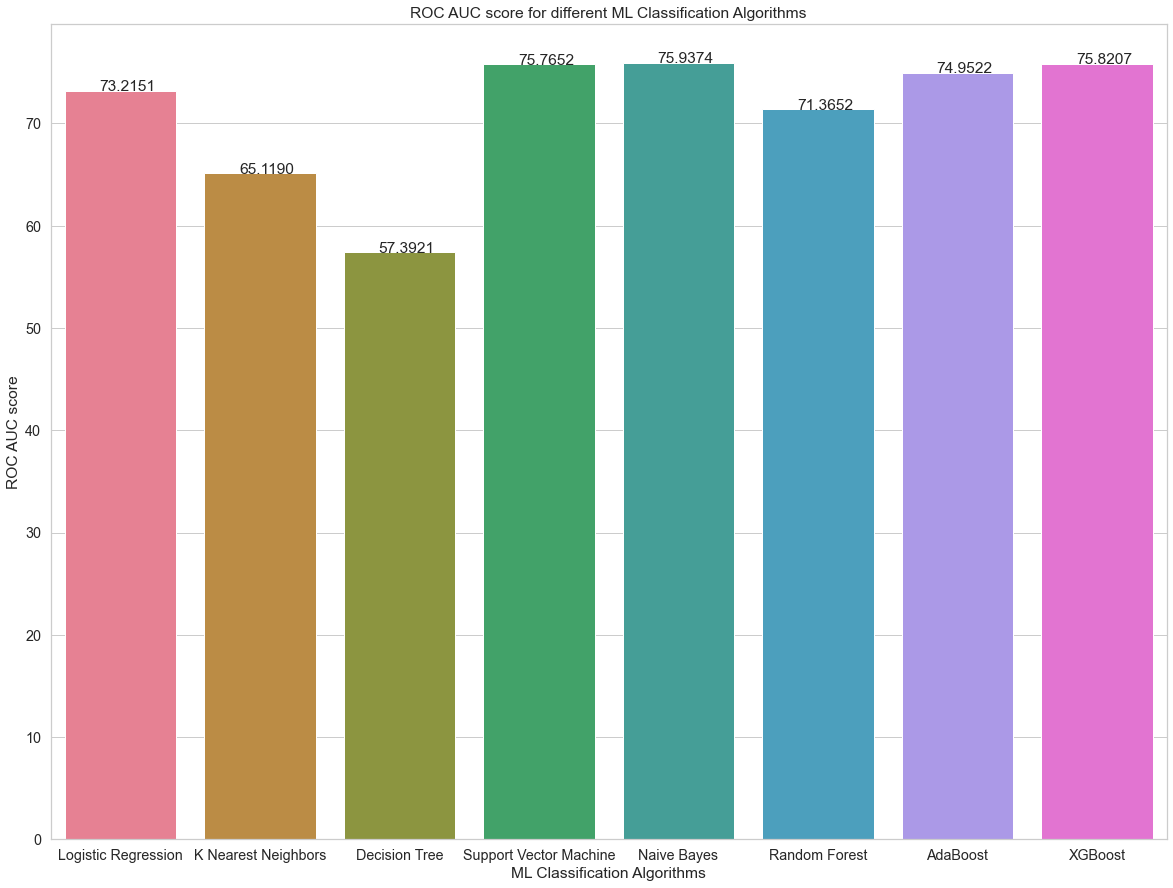

In [113]:
Y_roc_auc_list = [roc_auc_score(Y_test, Y_proba_test_logistic[:,1])*100, roc_auc_score(Y_test, Y_proba_test_knn[:,1])*100, 
               roc_auc_score(Y_test, Y_proba_test_decision_tree[:,1])*100, roc_auc_score(Y_test, Y_proba_test_svm[:,1])*100, 
               roc_auc_score(Y_test, Y_proba_test_naive_bayes[:,1])*100, roc_auc_score(Y_test, Y_proba_test_random_forest[:,1])*100, 
               roc_auc_score(Y_test, Y_proba_test_adaboost[:,1])*100, roc_auc_score(Y_test, Y_proba_test_xgboost[:,1])*100]

plt.figure(figsize = (20,15))
sns.set(font_scale = 1.3)
sns.set_style('whitegrid')
barplot_roc_auc = sns.barplot(list_of_algos, Y_roc_auc_list, palette = "husl")

barplot_roc_auc.set_xlabel('ML Classification Algorithms')
barplot_roc_auc.set_ylabel('ROC AUC score')
barplot_roc_auc.set_title('ROC AUC score for different ML Classification Algorithms')

for p in barplot_roc_auc.patches:
    barplot_roc_auc.annotate("{:.4f}".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))